In [13]:
!pip install scikit-learn matplotlib seaborn --quiet

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
digits = datasets.load_digits()

In [16]:
print("Shape of image data:", digits.images.shape)

Shape of image data: (1797, 8, 8)


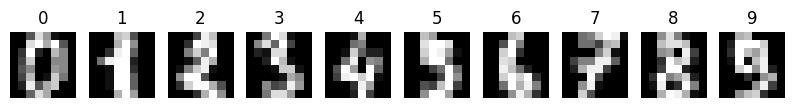

In [17]:
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [18]:
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = SVC(kernel='rbf', gamma=0.05, C=10)
model.fit(X_train, y_train)

SVC(C=10, gamma=0.05)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      1.00      1.00        28
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        34
           4       0.94      1.00      0.97        46
           5       0.94      0.98      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



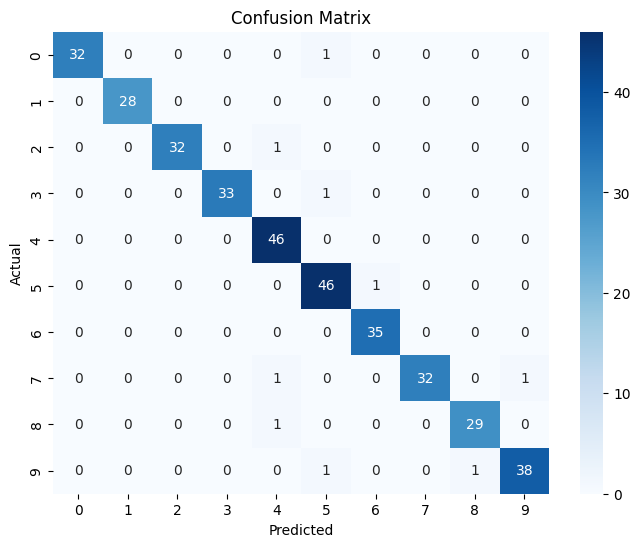

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()